#Credit Card Fraud

# Loading Data



In [1]:
!pip -q install kagglehub

import os
import pandas as pd
import kagglehub


path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")
print("Dataset folder:", path)
csv_path = os.path.join(path, "creditcard.csv")

df = pd.read_csv(csv_path)
df.head()


Dataset folder: /kaggle/input/creditcardfraud


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Checking the Data

In [3]:
df.shape

(284807, 31)

In [4]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [6]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
284802,False
284803,False
284804,False
284805,False


In [5]:
df.duplicated().sum()

np.int64(1081)

In [8]:
df.dtypes

,0
Time,float64
V1,float64
V2,float64
V3,float64
V4,float64
V5,float64
V6,float64
V7,float64
V8,float64
V9,float64


In [9]:
df.isna().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [10]:
df['Class'].value_counts()    # IMP  check if data is imbalanced

,count
Class,
0,284315
1,492


In [13]:
cls_counts = df['Class'].value_counts().sort_index()
cls_counts

,count
Class,
0,284315
1,492


In [17]:
cls_ratio = df['Class'].value_counts(normalize=True).sort_index()
cls_ratio

,proportion
Class,
0,0.998273
1,0.001727


In [18]:
print("\nAmount describe:\n", df['Amount'].describe())
print("\nV1 describe:\n", df['V1'].describe())
print("\nV2 describe:\n", df['V2'].describe())


Amount describe:
 count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

V1 describe:
 count    2.848070e+05
mean     1.168375e-15
std      1.958696e+00
min     -5.640751e+01
25%     -9.203734e-01
50%      1.810880e-02
75%      1.315642e+00
max      2.454930e+00
Name: V1, dtype: float64

V2 describe:
 count    2.848070e+05
mean     3.416908e-16
std      1.651309e+00
min     -7.271573e+01
25%     -5.985499e-01
50%      6.548556e-02
75%      8.037239e-01
max      2.205773e+01
Name: V2, dtype: float64


#Set up features/target, simple train/test split, and a first baseline (Logistic Regression)

In [19]:
# Imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, average_precision_score


In [20]:
# Set up the targets

x = df.drop(columns=['Class'])
y = df['Class'].values

In [21]:
# Train test split

x_train, x_test, y_train, y_test = train_test_split(
                                                    x,y,
                                                    test_size=0.20,
                                                    random_state=42,
                                                    stratify=y
)

- **class_weight='balanced'**

      
      Tells LR to upweight the minority class (fraud) and downweight the majority class (non-fraud) based on their frequencies. This helps with imbalanced data


-  **solver='liblinear'**
     Optimization algorithm.

       1 liblinear is robust on small/imbalanced or sparse-ish problems and supports class weights well.

       2 Alternatives: lbfgs (fast for larger dense data), saga (handles L1 regularization & large sparse).


- **C=1.0**


      Regularization strength inverse (bigger C = less regularization; smaller C = more).

      Start with 1.0.

      Tune later (e.g., try 0.5, 0.1, 2.0) to trade bias/variance.

In [22]:
# Build a pipeline

logit = Pipeline([
    ('scaler', StandardScaler()),   # standardize each column (mean 0, std 1)
    ('lr', LogisticRegression(
        max_iter=2000,
        class_weight='balanced',    # tell LR to upweight the minority class
        solver='liblinear',         # stable on small/imbalanced problems
        C=1.0,                      # regularization strength (1.0 is a decent default)
        random_state=42
    ))
])


In [23]:
logit.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lr',
                 LogisticRegression(class_weight='balanced', max_iter=2000,
                                    random_state=42, solver='liblinear'))])

In [25]:
test_prob = logit.predict_proba(x_test)[:,1]

In [26]:
roc = roc_auc_score(y_test, test_prob)
pr  = average_precision_score(y_test, test_prob)

print(f"Logistic Regression — Test ROC-AUC: {roc:.4f}")
print(f"Logistic Regression — Test PR-AUC : {pr:.4f}")

Logistic Regression — Test ROC-AUC: 0.9721
Logistic Regression — Test PR-AUC : 0.7189


# Tune the decision threshold

In [27]:
from sklearn.metrics import precision_recall_curve, f1_score

In [28]:
# 1) get precision, recall values across all possible thresholds
prec, rec, thresholds = precision_recall_curve(y_test, test_prob)

# 2) compute F1 score at each threshold
f1s = 2 * (prec * rec) / (prec + rec + 1e-9)

# 3) find the threshold that gives the highest F1
best_idx = f1s.argmax()
best_thr = thresholds[best_idx] if best_idx < len(thresholds) else 0.5
best_f1  = f1s[best_idx]
best_p   = prec[best_idx]
best_r   = rec[best_idx]

print(f"Best threshold: {best_thr:.3f}")
print(f"F1={best_f1:.4f} | Precision={best_p:.4f} | Recall={best_r:.4f}")


Best threshold: 1.000
F1=0.8247 | Precision=0.8333 | Recall=0.8163


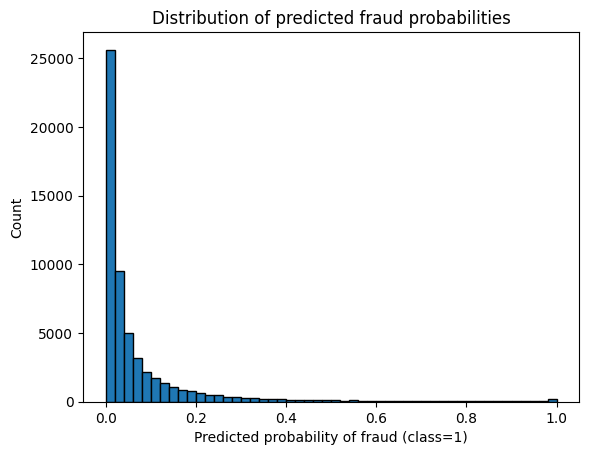

Min prob: 6.153448757970821e-31
Max prob: 1.0


In [30]:
import matplotlib.pyplot as plt

plt.hist(test_prob, bins=50, edgecolor='k')
plt.title("Distribution of predicted fraud probabilities")
plt.xlabel("Predicted probability of fraud (class=1)")
plt.ylabel("Count")
plt.show()

print("Min prob:", test_prob.min())
print("Max prob:", test_prob.max())


# Confusion matrix & classification report

In [31]:
from sklearn.metrics import confusion_matrix, classification_report

for thr in [0.5, 0.1, 1.0]:
    preds = (test_prob >= thr).astype(int)   # turn probs into 0/1 predictions
    cm = confusion_matrix(y_test, preds)
    print(f"\n=== Threshold = {thr} ===")
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", classification_report(y_test, preds, digits=4))



=== Threshold = 0.5 ===
Confusion Matrix:
 [[55479  1385]
 [    8    90]]
Classification Report:
               precision    recall  f1-score   support

           0     0.9999    0.9756    0.9876     56864
           1     0.0610    0.9184    0.1144        98

    accuracy                         0.9755     56962
   macro avg     0.5304    0.9470    0.5510     56962
weighted avg     0.9982    0.9755    0.9861     56962


=== Threshold = 0.1 ===
Confusion Matrix:
 [[45521 11343]
 [    5    93]]
Classification Report:
               precision    recall  f1-score   support

           0     0.9999    0.8005    0.8892     56864
           1     0.0081    0.9490    0.0161        98

    accuracy                         0.8008     56962
   macro avg     0.5040    0.8748    0.4526     56962
weighted avg     0.9982    0.8008    0.8877     56962


=== Threshold = 1.0 ===
Confusion Matrix:
 [[56853    11]
 [   51    47]]
Classification Report:
               precision    recall  f1-score   sup

# Train & Evaluate XGBoost

In [33]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, average_precision_score

In [35]:
# class imbalance: ratio of negatives to positives
neg = (y_train == 0).sum()
pos = (y_train == 1).sum()
spw = neg / pos   # scale_pos_weight

xgb = XGBClassifier(
    n_estimators=300,       # number of trees
    max_depth=5,            # tree depth
    learning_rate=0.05,     # step size
    subsample=0.8,          # row sampling
    colsample_bytree=0.8,   # column sampling
    random_state=42,
    scale_pos_weight=spw,   # handle imbalance
    use_label_encoder=False,
    eval_metric="auc"
)

xgb.fit(x_train, y_train)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:53:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, ...)

In [37]:
test_prob_xgb = xgb.predict_proba(x_test)[:, 1]

roc = roc_auc_score(y_test, test_prob_xgb)
pr  = average_precision_score(y_test, test_prob_xgb)

print(f"XGBoost — Test ROC-AUC: {roc:.4f}")
print(f"XGBoost — Test PR-AUC : {pr:.4f}")


XGBoost — Test ROC-AUC: 0.9810
XGBoost — Test PR-AUC : 0.8690


In [38]:
from sklearn.metrics import precision_recall_curve
import numpy as np

prec, rec, thr = precision_recall_curve(y_test, test_prob_xgb)
f1s = 2 * (prec * rec) / (prec + rec + 1e-9)

best_idx = np.argmax(f1s[:-1])   # ignore last point
best_thr = thr[best_idx]
best_f1  = f1s[best_idx]

print(f"Best threshold: {best_thr:.3f}, Best F1: {best_f1:.4f}")


Best threshold: 0.963, Best F1: 0.8634


In [39]:
from sklearn.metrics import confusion_matrix, classification_report

for thr in [0.5, 0.1, 0.01]:
    preds = (test_prob_xgb >= thr).astype(int)
    cm = confusion_matrix(y_test, preds)
    print(f"\n=== Threshold = {thr} ===")
    print("Confusion Matrix:\n", cm)
    print("Report:\n", classification_report(y_test, preds, digits=4))



=== Threshold = 0.5 ===
Confusion Matrix:
 [[56841    23]
 [   15    83]]
Report:
               precision    recall  f1-score   support

           0     0.9997    0.9996    0.9997     56864
           1     0.7830    0.8469    0.8137        98

    accuracy                         0.9993     56962
   macro avg     0.8914    0.9233    0.9067     56962
weighted avg     0.9994    0.9993    0.9993     56962


=== Threshold = 0.1 ===
Confusion Matrix:
 [[56743   121]
 [   11    87]]
Report:
               precision    recall  f1-score   support

           0     0.9998    0.9979    0.9988     56864
           1     0.4183    0.8878    0.5686        98

    accuracy                         0.9977     56962
   macro avg     0.7090    0.9428    0.7837     56962
weighted avg     0.9988    0.9977    0.9981     56962


=== Threshold = 0.01 ===
Confusion Matrix:
 [[55912   952]
 [    8    90]]
Report:
               precision    recall  f1-score   support

           0     0.9999    0.9833    0

# Hyperparameter Tuning for XGBoost.

In [40]:
!pip -q install optuna

import optuna
from sklearn.metrics import average_precision_score


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.4/247.4 kB 21.8 MB/s eta 0:00:00


In [43]:
from xgboost import XGBClassifier

def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 200, 800),
        "max_depth": trial.suggest_int("max_depth", 3, 8),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2, log=True),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.5, 5.0, log=True),
    }

    # imbalance weight
    neg, pos = (y_train == 0).sum(), (y_train == 1).sum()
    spw = neg / pos

    # train a model
    clf = XGBClassifier(
        **params,
        random_state=42,
        tree_method="hist",
        scale_pos_weight=spw,
        eval_metric="aucpr",
        n_jobs=-1
    )
    clf.fit(x_train, y_train)

    # evaluate on validation (here using test for simplicity, in pro version use CV)
    prob = clf.predict_proba(x_test)[:, 1]
    return average_precision_score(y_test, prob)


In [44]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20, show_progress_bar=True)

print("Best params:", study.best_params)
print("Best PR-AUC:", study.best_value)


[I 2025-08-29 14:57:00,639] A new study created in memory with name: no-name-9246c4c0-98e8-4554-b539-cde1ec896116


  0%|          | 0/20 [00:00<?, ?it/s]

[I 2025-08-29 14:57:32,083] Trial 0 finished with value: 0.8506751808877876 and parameters: {'n_estimators': 566, 'max_depth': 7, 'learning_rate': 0.010761658434797563, 'subsample': 0.8289547028221949, 'colsample_bytree': 0.6103390708499298, 'reg_lambda': 2.457433256783545}. Best is trial 0 with value: 0.8506751808877876.
[I 2025-08-29 14:57:40,008] Trial 1 finished with value: 0.801469685819258 and parameters: {'n_estimators': 207, 'max_depth': 5, 'learning_rate': 0.024306441323863035, 'subsample': 0.7813665900713674, 'colsample_bytree': 0.7343058508960447, 'reg_lambda': 1.2897064817216286}. Best is trial 0 with value: 0.8506751808877876.
[I 2025-08-29 14:57:51,284] Trial 2 finished with value: 0.8893385446742128 and parameters: {'n_estimators': 293, 'max_depth': 7, 'learning_rate': 0.19210838924008586, 'subsample': 0.8980578628234824, 'colsample_bytree': 0.6073718666000113, 'reg_lambda': 0.7845039076548007}. Best is trial 2 with value: 0.8893385446742128.
[I 2025-08-29 14:58:07,919] 

In [46]:
best_params = study.best_params

neg, pos = (y == 0).sum(), (y == 1).sum()
spw = neg / pos

final_xgb = XGBClassifier(
    **best_params,
    random_state=42,
    tree_method="hist",
    scale_pos_weight=spw,
    eval_metric="aucpr",
    n_jobs=-1
)
final_xgb.fit(x_train, y_train)

test_prob_final = final_xgb.predict_proba(x_test)[:, 1]
print("Final PR-AUC:", average_precision_score(y_test, test_prob_final))


Final PR-AUC: 0.8878418894690752
